In [3]:
import astropy.io.fits as pf
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as sl
import sklearn.svm as ss
import matplotlib.cm as cm
from sklearn import metrics

In [4]:
training = pf.open("SDSS_QSO_star_training.fits")
test = pf.open("SDSS_QSO_star_testing.fits")

(-0.5, 1.5)

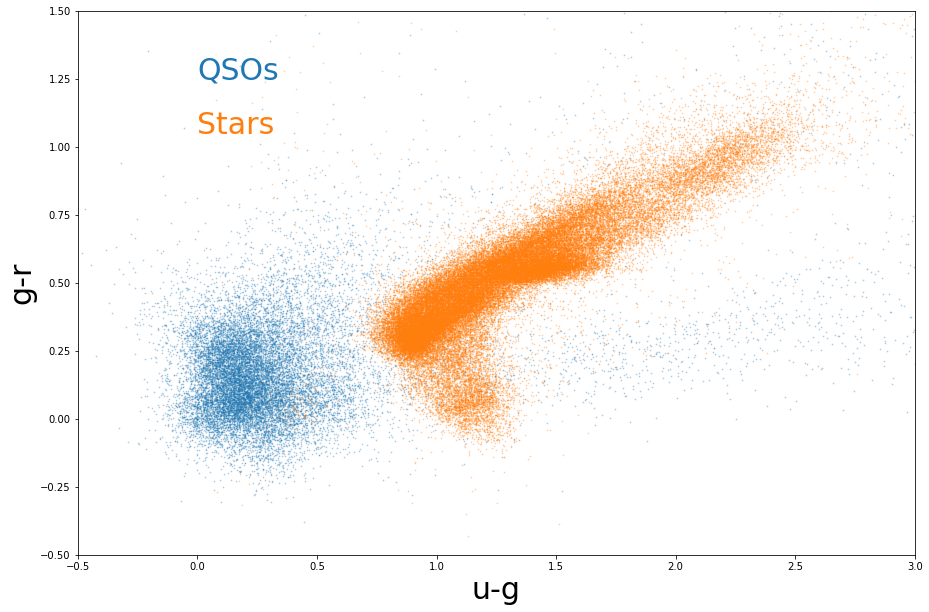

In [5]:
plt.figure(figsize=(15,10))
search = np.where(training[1].data==1)
plt.scatter(training[0].data[search[0],0],training[0].data[search[0],1],c='C0',label='QSO',s=0.5,alpha=0.3)
search = np.where(training[1].data==0)
plt.scatter(training[0].data[search[0],0],training[0].data[search[0],1],c='C1',label='Star',s=0.5,alpha=0.3)
plt.xlabel('u-g',fontsize=30)
plt.ylabel('g-r',fontsize=30)
plt.text(0.,1.25,'QSOs',fontsize=30,color='C0')
plt.text(0.,1.05,'Stars',fontsize=30,color='C1')
plt.xlim(-0.5,3)
plt.ylim(-0.5,1.5)

In [6]:
lg = sl.LogisticRegression()

In [7]:
lg.fit(training[0].data[:,:1],training[1].data)

LogisticRegression()

In [8]:
probability = 1./(1+np.exp(-1*(-3.69*training[0].data[:,:1]+2.13)))

In [9]:
y_pred = lg.predict(training[0].data[:,:1])
y_prob = lg.predict_proba(training[0].data[:,:1]) # output the predicted probability


(-0.5, 1.5)

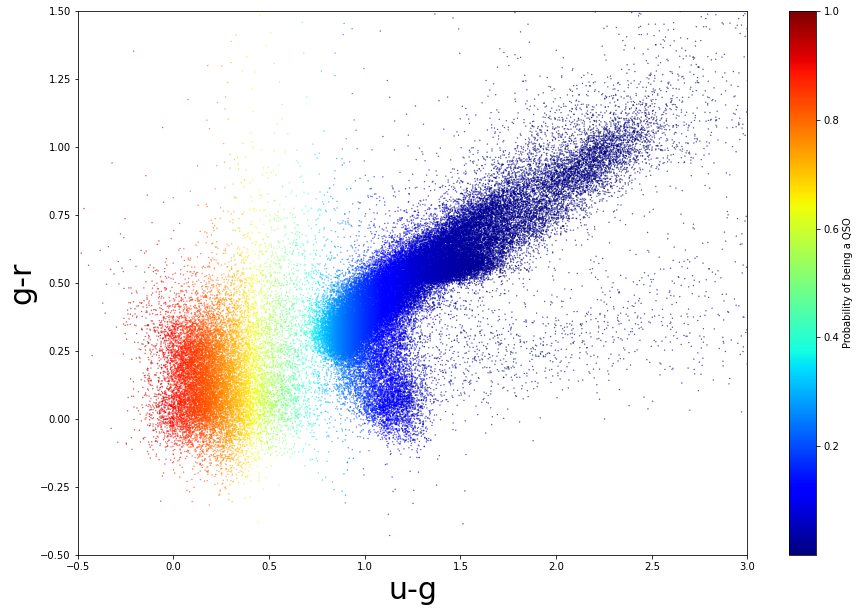

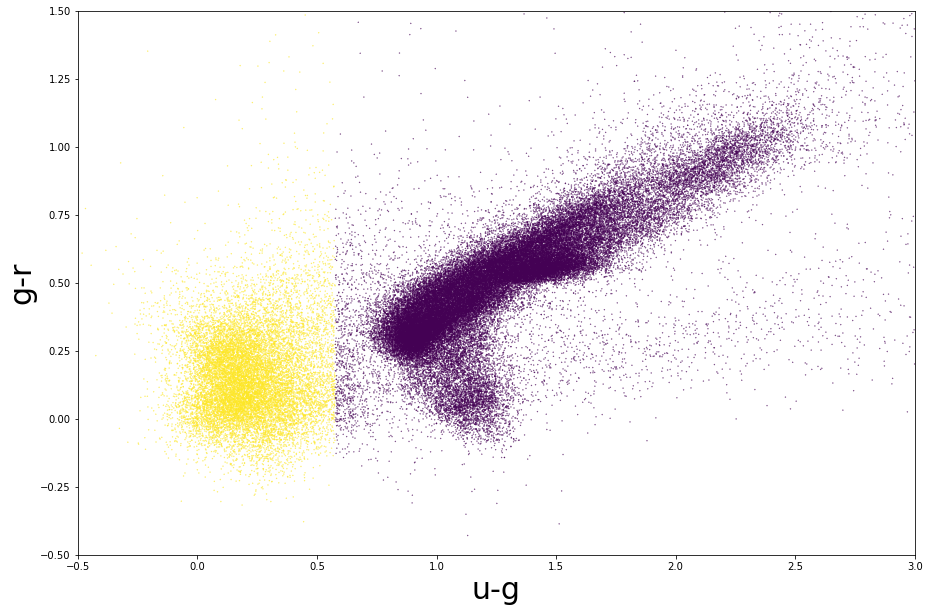

In [10]:
plt.figure(figsize=(15,10))
plt.scatter(training[0].data[:,0],training[0].data[:,1],c=y_prob[:,1],s=0.1,cmap=cm.jet)
plt.colorbar(label='Probability of being a QSO')
#y_prob = lg.predict_proba(training[0].data)
plt.xlabel('u-g',fontsize=30)
plt.ylabel('g-r',fontsize=30)
plt.xlim(-0.5,3)
plt.ylim(-0.5,1.5)
plt.figure(figsize=(15,10))
plt.scatter(training[0].data[:,0],training[0].data[:,1],c=y_pred,s=0.1)#,cmap=cm.jet)
#plt.colorbar(label='Prediction')
#y_prob = lg.predict_proba(training[0].data)
plt.xlabel('u-g',fontsize=30)
plt.ylabel('g-r',fontsize=30)
plt.xlim(-0.5,3)
plt.ylim(-0.5,1.5)

(array([58951.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 18997.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

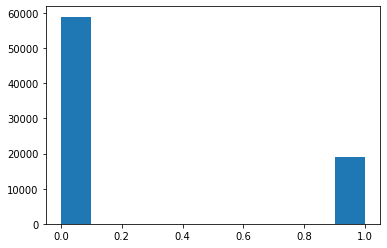

In [11]:
plt.hist(training[1].data)

In [12]:
def completeness_purity(true_value,prediction):
    
    number_QSO = len(true_value[np.where(true_value==1)])
    number_QSO_pred = len(prediction[np.where(prediction==1)])
    number_QSO_pred_as_QSO = len(prediction[np.where((prediction==1)&(true_value==1))])
    number_QSO_pred_as_star = len(prediction[np.where((prediction==0)&(true_value==1))])
    
    return number_QSO_pred_as_QSO/number_QSO_pred, number_QSO_pred_as_QSO/number_QSO 

In [13]:
print(completeness_purity(training[1].data,y_pred))

(0.989867646127541, 0.8228141285466126)


In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
clf = DecisionTreeClassifier(random_state=0, criterion='entropy',max_depth=5)
clf.fit(training[0].data[:,:2],training[1].data)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [17]:
y_pred_dt = clf.predict(training[0].data[:,:2])
y_prob_dt = clf.predict_proba(training[0].data[:,:2]) # output the predicted probability

(array([59908.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 18040.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

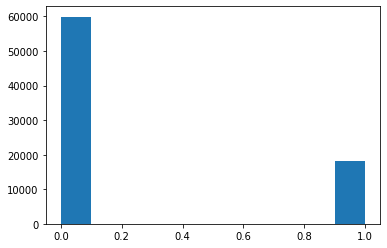

In [20]:
plt.hist(y_pred_dt)

In [23]:
for i in range(1,10):
    clf = DecisionTreeClassifier(random_state=0, criterion='entropy',max_depth=i)
    clf.fit(training[0].data[:,:2],training[1].data)
    y_pred_dt = clf.predict(training[0].data[:,:2])
    y_prob_dt = clf.predict_proba(training[0].data[:,:2])
    
    print(i,completeness_purity(training[1].data,y_pred_dt))

1 (0.984524378585086, 0.8673474759172501)
2 (0.9663128491620112, 0.9105121861346528)
3 (0.983847623458577, 0.8945622993104174)
4 (0.9785340896452007, 0.9262515133968522)
5 (0.9798780487804878, 0.9305153445280834)
6 (0.9844991388410467, 0.9327788598199716)
7 (0.9834987116934378, 0.9443596357319577)
8 (0.9856209867735031, 0.9453597936516293)
9 (0.9837805475425897, 0.9514660209506764)


In [29]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from IPython.display import display
dot_data = export_graphviz(
clf, 
out_file=None,
feature_names=['u-g', 'g-r'],  
class_names=['stars', 'quasars'],  
filled=True,
rounded=True)

In [34]:
clf1 = DecisionTreeClassifier(random_state=0, criterion='entropy',max_depth=5)
clf1.fit(training[0].data[:,:2],training[1].data)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

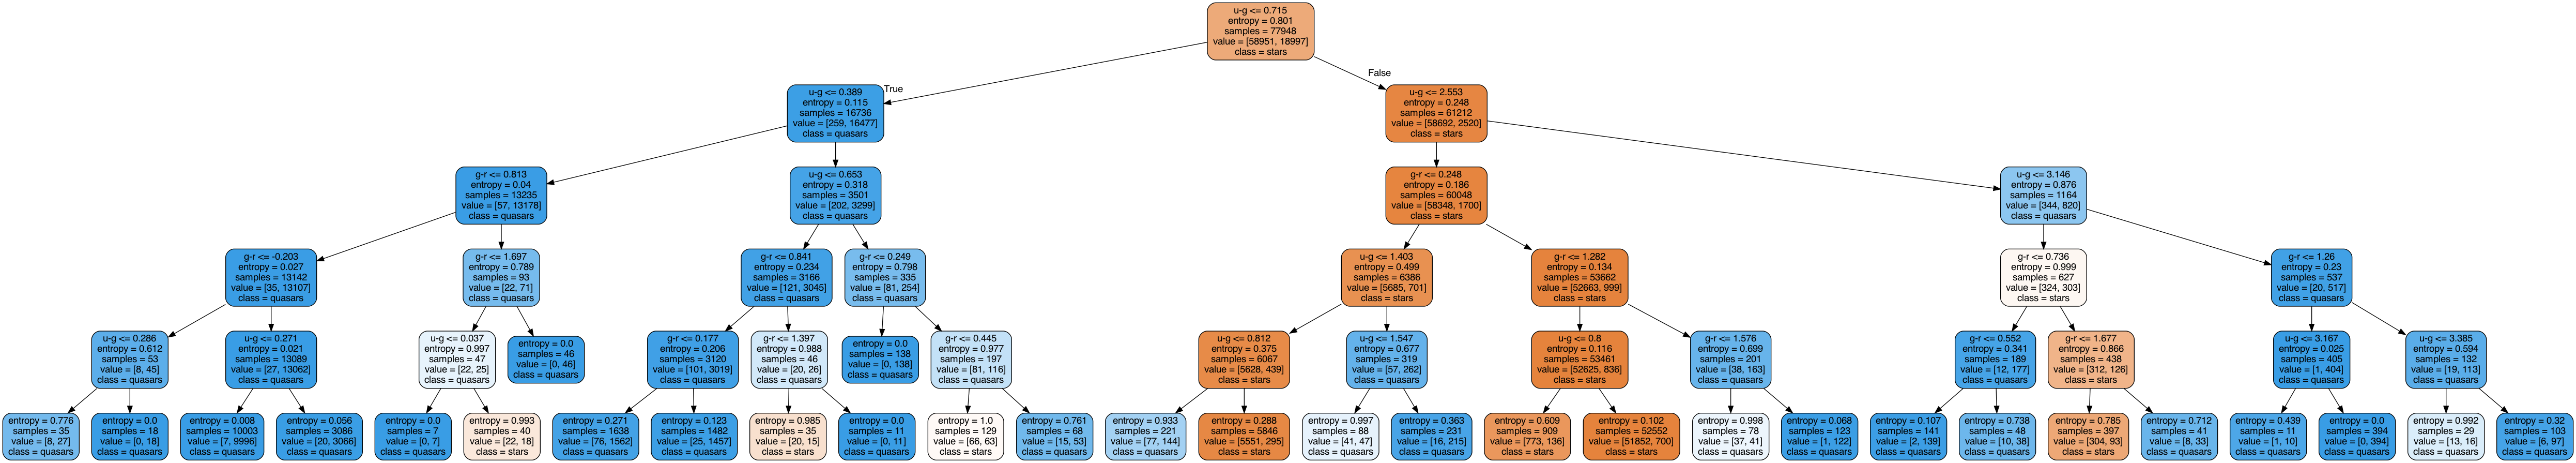

In [35]:
dot_data = export_graphviz(
clf1, 
out_file=None,
feature_names=['u-g', 'g-r'],  
class_names=['stars', 'quasars'],  
filled=True,
rounded=True )

graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))


In [38]:
import sklearn.ensemble as se 

In [43]:
rf = se.RandomForestClassifier(criterion='entropy',max_depth=10,n_estimators=500,n_jobs=4)

In [44]:
rf.fit(training[0].data[:,:4],training[1].data)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500,
                       n_jobs=4)

In [45]:
print(completeness_purity(training[1].data,rf.predict(training[0].data[:,:4])))

(0.9956617213861068, 0.9785755645628257)


(array([[17832.,   323.,   189.,   158.,   169.,   152.,   146.,   215.,
           540., 58224.],
        [58224.,   540.,   215.,   146.,   152.,   169.,   158.,   189.,
           323., 17832.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

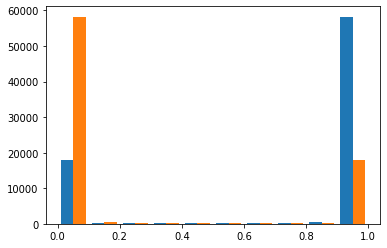

In [48]:
plt.hist(rf.predict_proba(training[0].data[:,:4]))

In [ ]:
max_depth = [] 
completeness = [] 
for i in range(1,20):
    rf = se.RandomForestClassifier(criterion='entropy',max_depth=i,n_estimators=500,n_jobs=4)
    rf.fit(training[0].data[:,:4],training[1].data)
    max_depth.append(i)
    completeness.append()